# Fastai tabular

In [ ]:
!nvidia-smi

Sun May  2 06:08:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    30W /  70W |   1078MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.3MB/s eta 0:04:11tcmalloc: large alloc 1147494400 bytes == 0x55b710f0a000 @  0x7fe470336615 0x55b6d6c6706c 0x55b6d6d46eba 0x55b6d6c69e8d 0x55b6d6d5b99d 0x55b6d6cddfe9 0x55b6d6cd8b0e 0x55b6d6c6b77a 0x55b6d6cdde50 0x55b6d6cd8b0e 0x55b6d6c6b77a 0x55b6d6cda86a 0x55b6d6d5c7c6 0x55b6d6cd9ee2 0x55b6d6d5c7c6 0x55b6d6cd9ee2 0x55b6d6d5c7c6 0x55b6d6cd9ee2 0x55b6d6d5c7c6 0x55b6d6dde431 0x55b6d6d3f049 0x55b6d6ca9c84 0x55b6d6c6a8e9 0x55b6d6cdeade 0x55b6d6c6b69a 0x55b6d6cd9a45 0x55b6d6cd8e0d 0x55b6d6c6b77a 0x55b6d6cd9a45 0x55b6d6c6b69a 0x55b6d6cd9a45
     |█████████████████████████████▏  | 1055.7MB 1.3MB/s eta 0:01:21tcmalloc: large alloc 1434370048 bytes == 0x55b755560000 @  0x7fe470336615 0x55b6d6c6706c 0x55b6d6d46eba 0x55b6d6c69e8d 0x55b6d6d5b99d 0x55b6d6cddfe9 0x55b6d6cd8b0e 0x55b6d6c6b77a 0x55b6d6cdde50 0x55b6d6cd8b0e 0x55b6d6c6b77a 0x55b6d6cda86a 0x55b6d6d5c7c6 0x55b6d6cd9ee2 0

In [ ]:
import torch
torch.__version__

'1.7.1+cu110'

In [ ]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 194kB 8.5MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 


In [ ]:
import fastai
fastai.__version__

'2.3.0'

In [ ]:
from fastai.tabular.all import *

We can download a sample of this dataset with the usual untar_data command

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/adult_sample/models'),Path('/root/.fastai/data/adult_sample/export.pkl'),Path('/root/.fastai/data/adult_sample/adult.csv')]

Then we can have a look at how the data is structured:

In [ ]:
df = pd.read_csv(path/'adult.csv')
df.head()

age          workclass  fnlwgt  ... hours-per-week  native-country salary
0   49            Private  101320  ...             40   United-States  >=50k
1   44            Private  236746  ...             45   United-States  >=50k
2   38            Private   96185  ...             32   United-States   <50k
3   38       Self-emp-inc  112847  ...             40   United-States  >=50k
4   42   Self-emp-not-inc   82297  ...             50   United-States   <50k

[5 rows x 15 columns]

Some of the columns are continuous (like age) and we will treat them as float numbers we can feed our model directly. Others are categorical (like workclass or education) and we will convert them to a unique index that we will feed to embedding layers. We can specify our categorical and continuous column names, as well as the name of the dependent variable in TabularDataLoaders factory methods

In [ ]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary", bs = 25,
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
dls.show_batch()

In [ ]:
len(df.education.unique())

16

We can define a model using the tabular_learner method. When we define our model, fastai will try to infer the loss function based on our y_names earlier.

In [ ]:
learn = tabular_learner(dls, metrics=[accuracy],layers=[50,10])

In [ ]:
#learn.save('model.pkl')

Path('/root/.fastai/data/adult_sample/models/model.pkl.pth')

In [ ]:
learn.summary()

TabularModel (Input shape: 25 x torch.Size([25, 3]))
Layer (type)         Output Shape         Param #    Trainable 
                     25 x 6              
Embedding                                 60         True      
____________________________________________________________________________
                     25 x 8              
Embedding                                 136        True      
____________________________________________________________________________
                     25 x 5              
Embedding                                 40         True      
____________________________________________________________________________
                     25 x 8              
Embedding                                 128        True      
____________________________________________________________________________
                     25 x 5              
Embedding                                 35         True      
_____________________________________________

we can train that model with the fit_one_cycle method 

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
learn.show_results()

In [ ]:
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

In [ ]:
learn.get_preds(dl=dl)

(tensor([[0.7629, 0.2371],
         [0.7409, 0.2591],
         [0.8369, 0.1631],
         ...,
         [0.7550, 0.2450],
         [0.8660, 0.1340],
         [0.8796, 0.1204]]), None)

# Fastai vision


In [ ]:
from fastai.vision.all import *

# Single-label classification

The dataset can be downloaded and decompressed with this line of code:

In [ ]:
path = untar_data(URLs.PETS)

It will only do this download once, and return the location of the decompressed archive. We can check what is inside with the .ls() method.

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

In [ ]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/pug_6.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_131.jpg'))

We can then define an easy label function:

In [ ]:
def label_func(f): return f[0].isupper()

To get our data ready for a model, we need to put it in a DataLoaders object. Here we have a function that labels using the file names, so we will use ImageDataLoaders.from_name_func

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

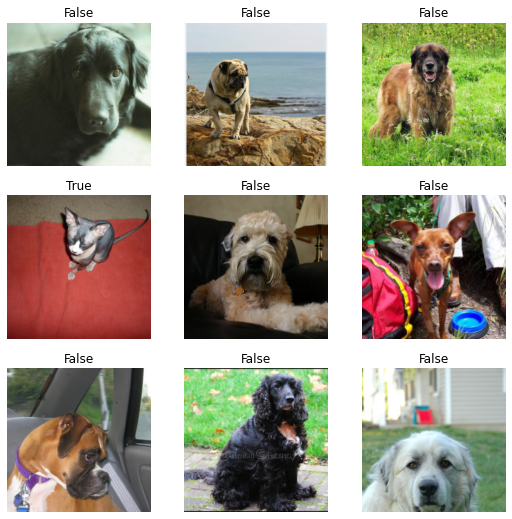

In [ ]:
dls.show_batch()

Then we can create a Learner, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code:

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.summary()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                      

In [ ]:
learn.fine_tune(1)

In [ ]:
learn.predict(files[0])

('False', tensor(0), tensor([1.0000e+00, 4.9697e-07]))

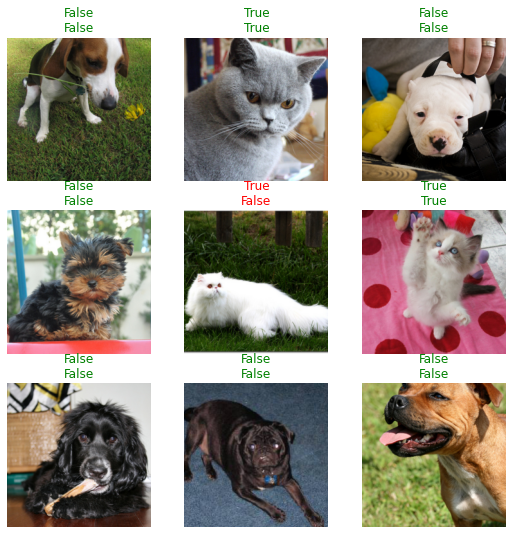

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

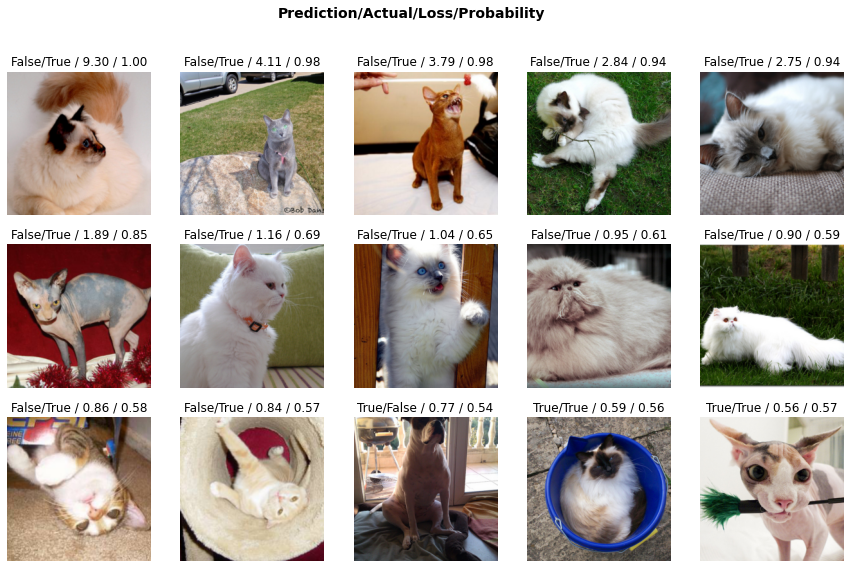

In [ ]:
interp.plot_top_losses(k=15)

# Classifying breeds

In [ ]:
files[0].name

'pug_6.jpg'

A regular expression that will catch the name is:

In [ ]:
#regex for name
pat = r'^(.*)_\d+.jpg'

Since it's pretty common to use regular expressions to label the data (often, labels are hidden in the file names), there is a factory method to do just that:

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

we can then use show_batch to have a look at our data

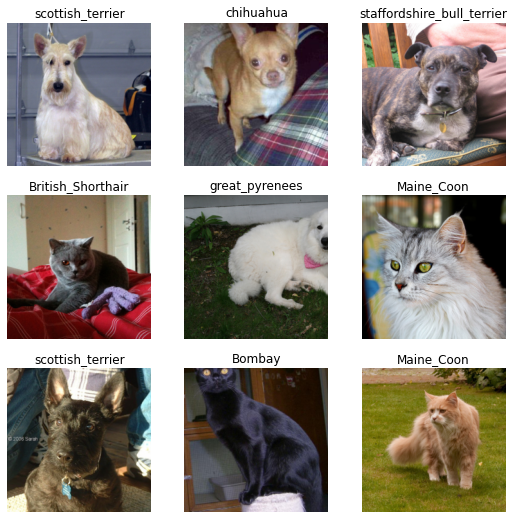

In [ ]:
dls.show_batch()

Since classifying the exact breed of cats or dogs amongst 37 different breeds is a harder problem, we will slightly change the definition of our DataLoaders to use data augmentation

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

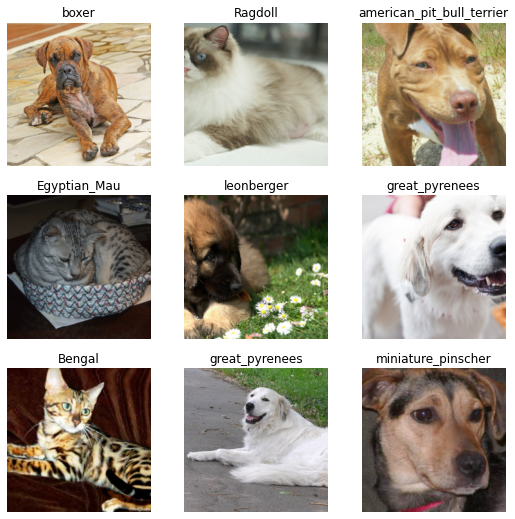

In [ ]:
dls.show_batch()


We can then create our Learner exactly as before and train our model.



In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])

We used the default learning rate before, but we might want to find the best one possible. For this, we can use the learning rate finder:

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

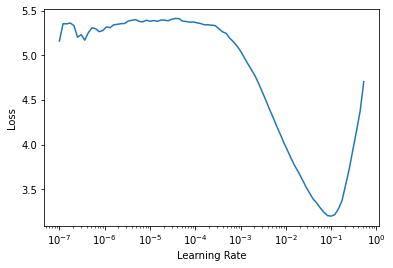

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

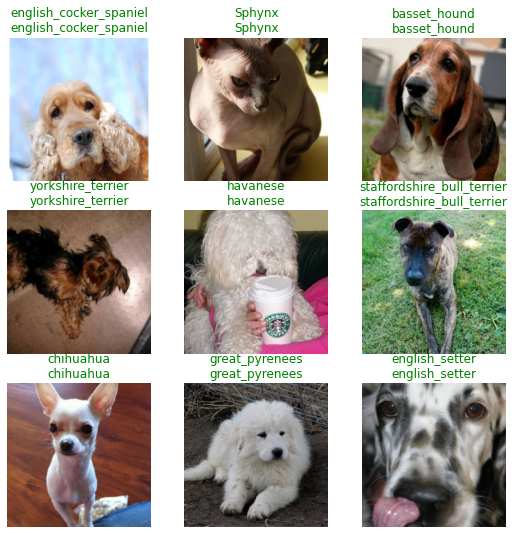

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp2=ClassificationInterpretation.from_learner(learn)

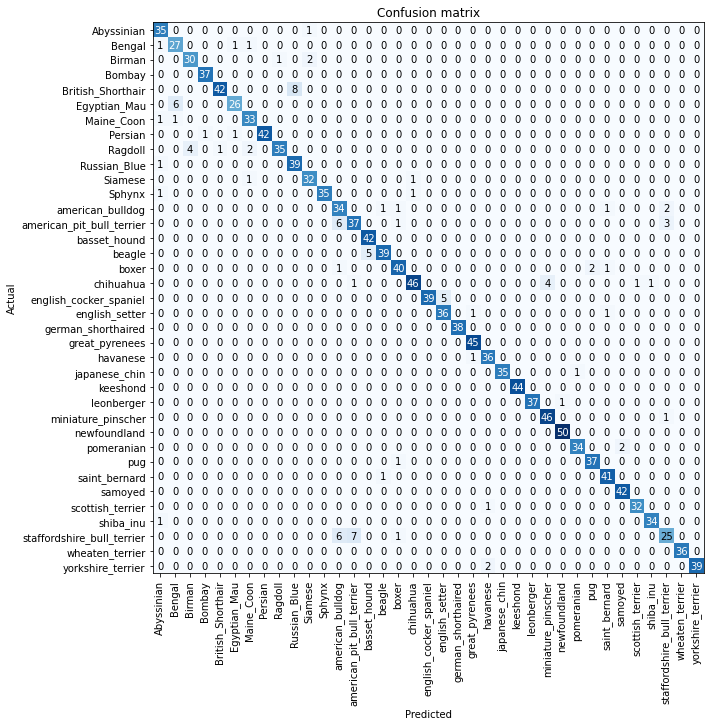

In [ ]:
interp2.plot_confusion_matrix(figsize=(15,10))

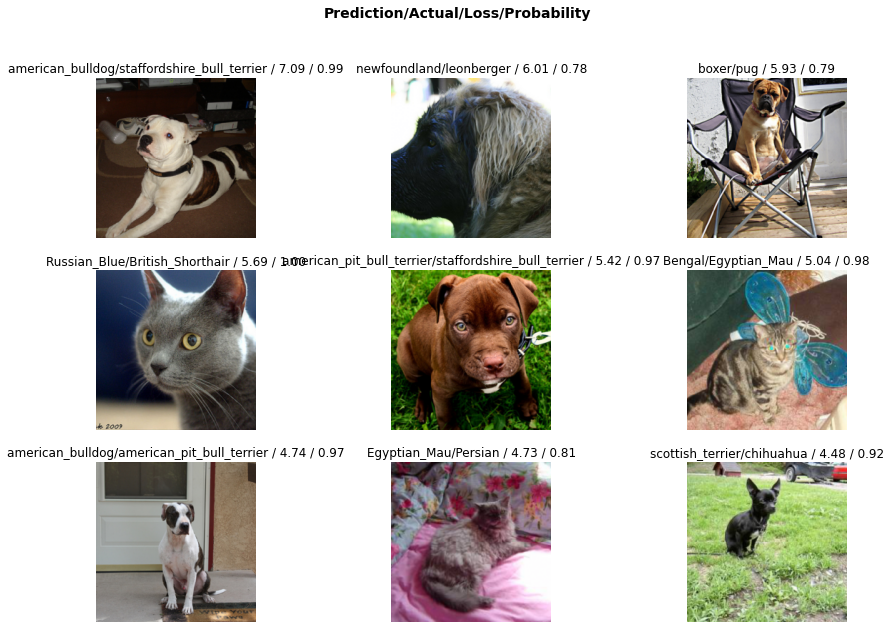

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

# Multi-label classification

In [ ]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/train.csv')]

In [ ]:
df = pd.read_csv(path/'train.csv')
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [ ]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

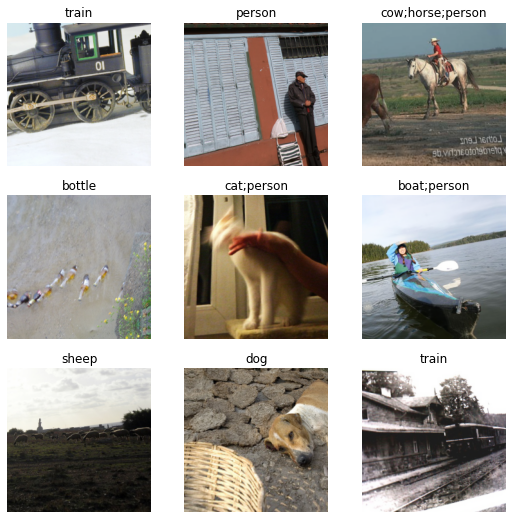

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.033113110810518265)

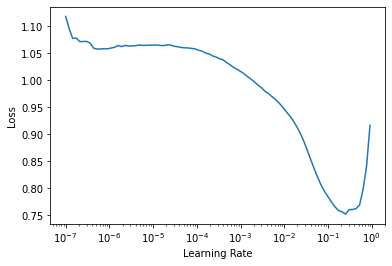

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-2)

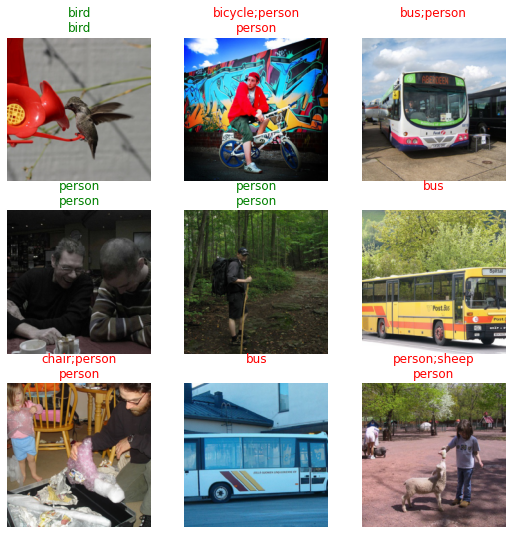

In [ ]:
learn.show_results()